# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from wordcloud import WordCloud
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

In [2]:
train = pd.read_csv('comments_train.csv')
test = pd.read_csv('comments_test.csv')

In [3]:
df = pd.concat([train, test], ignore_index = True)

In [4]:
df.shape

(223549, 9)

In [5]:
df.dtypes

,0
id,object
comment_text,object
toxic,int64
severe_toxic,int64
obscene,int64
threat,int64
insult,int64
identity_hate,int64
moderation_label,int64


In [30]:
print(df.isnull().sum())

id                  0
comment_text        0
toxic               0
severe_toxic        0
obscene             0
threat              0
insult              0
identity_hate       0
moderation_label    0
text_length         0
word_count          0
cleaned_text        0
dtype: int64


In [6]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,moderation_label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [8]:
df['moderation_label'].value_counts(normalize=True)

,proportion
moderation_label,
0,0.899494
1,0.100506


Class imbalance: only 10% of comments are flagged as toxic

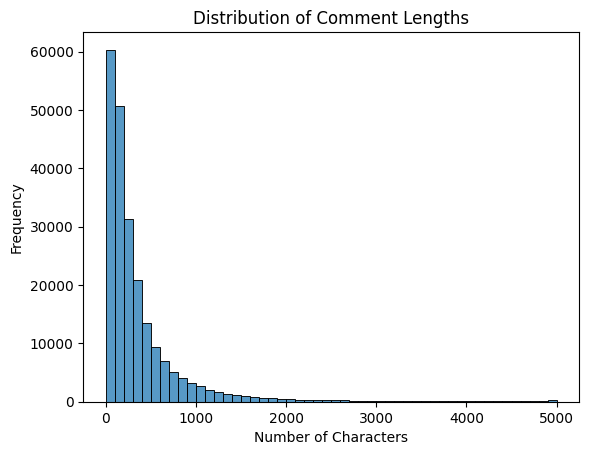

In [9]:
df['text_length'] = df['comment_text'].apply(len)

sns.histplot(df['text_length'], bins=50)
plt.title("Distribution of Comment Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

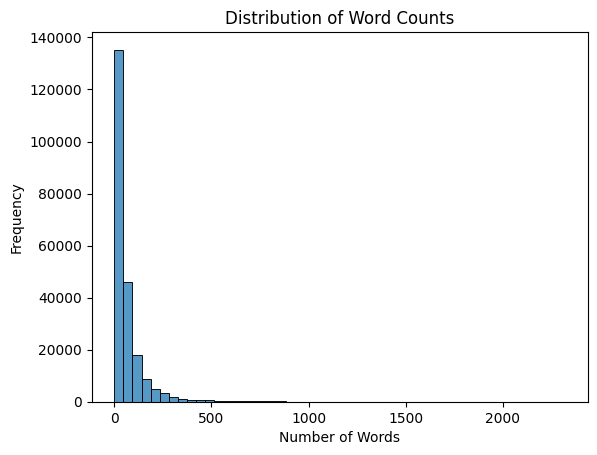

In [10]:
df['word_count'] = df['comment_text'].apply(lambda x: len(x.split()))
sns.histplot(df['word_count'], bins=50)
plt.title("Distribution of Word Counts")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

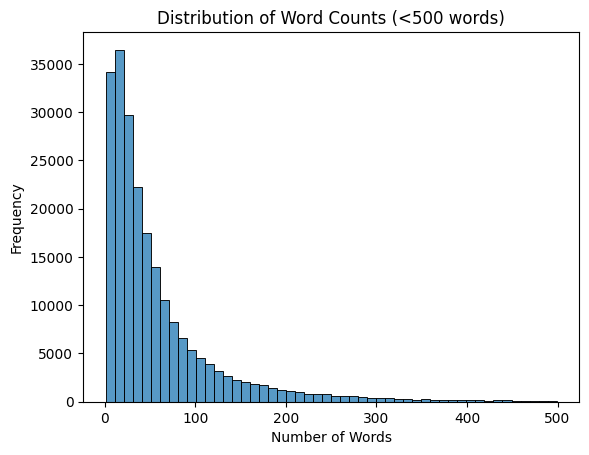

In [11]:
# Filter to rows with < 500 words
filtered_df = df[df['word_count'] < 500]


sns.histplot(filtered_df['word_count'], bins=50)
plt.title("Distribution of Word Counts (<500 words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

Expected right-skewed distribution for comment lengths. Most commens are less than 100 words.

In [13]:
toxic_text = " ".join(df[df['moderation_label'] == 1]['comment_text'])

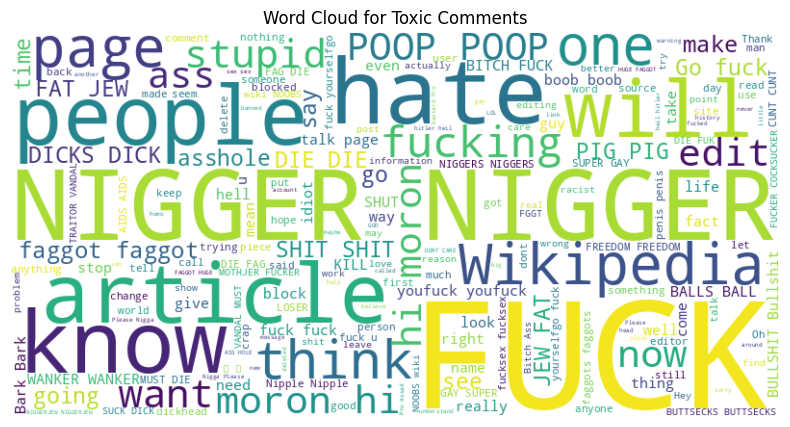

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(toxic_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Toxic Comments")
plt.show()

In [24]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

In [26]:
df['cleaned_text'] = df['comment_text'].apply(clean_text)

In [27]:
toxic_words = " ".join(df[df['moderation_label'] == 1]['cleaned_text']).split()
common_toxic_words = Counter(toxic_words).most_common(20)

In [28]:
pd.DataFrame(common_toxic_words, columns=['Word', 'Frequency'])

,Word,Frequency
0,fuck,14230
1,nigger,5546
2,fucking,5013
3,like,4914
4,shit,4910
5,dont,4630
6,wikipedia,4063
7,suck,3960
8,ass,3738
9,hate,3710


In [31]:
non_toxic_words = " ".join(df[df['moderation_label'] == 0]['cleaned_text']).split()
common_words = Counter(non_toxic_words).most_common(20)

In [32]:
pd.DataFrame(common_words, columns=['Word', 'Frequency'])

,Word,Frequency
0,article,74980
1,page,57229
2,wikipedia,42467
3,would,38985
4,please,38009
5,one,36516
6,talk,35609
7,like,33230
8,dont,30684
9,see,28111


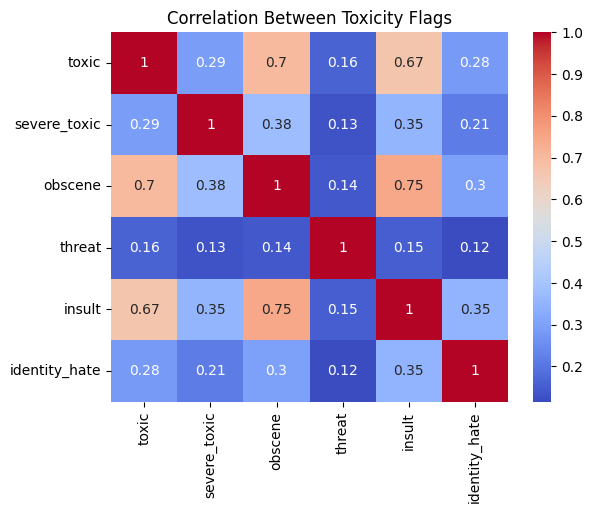

In [29]:
toxicity_flags = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
corr = df[toxicity_flags].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Toxicity Flags")
plt.show()